# In this notebook we plan the fix-priority path for two agents on the hybrid graph and animate the result.

In [1]:
import sys
sys.path.append('../../')
from panav.env import NavigationEnv, Box2DRegion, box_2d_center
from panav.hybrid import HybridGraph
from panav.viz import draw_env,draw_hybrid

import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

## Single-tunnel environment

In [2]:


# 2D navigation environment
start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])


start_locs = np.array([[5,1],[-5,-1]])*1.5

goal_locs = np.array([[-5,1],[5,-1]])*1.5



starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]
limits = [(-10.0,10.0),(-10.0,10.0)]


# O1 = Box2DRegion((-5.0,-0.5),(0.5,10))
# O2 = Box2DRegion((-0.0,5.0),(-10,-1.0))
# env = NavigationEnv(limits,[O1,O2],starts,goals)


O1 = Box2DRegion((-2.5,2.5),(0.5,10))
# O1 = Box2DRegion((-2.5,2.5),(2.0,10))
O2 = Box2DRegion((-2.5,2.5),(-10,-1.0))
env = NavigationEnv(limits,[O1,O2],starts,goals)


# O1 = Box2DRegion((-2.5,2.5),(0.5,10))
# O2 = Box2DRegion((-2.5,2.5),(-3,-1.0))
# O3 = Box2DRegion((-2.5,2.5),(-10.0,-4.0))
# env = NavigationEnv(limits,[O1,O2,O3],starts,goals)


# Construct the hybrid graph representation of the environment
bloating_r = 0.5 
HG =  HybridGraph(env,bloating_r)


Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-18


/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


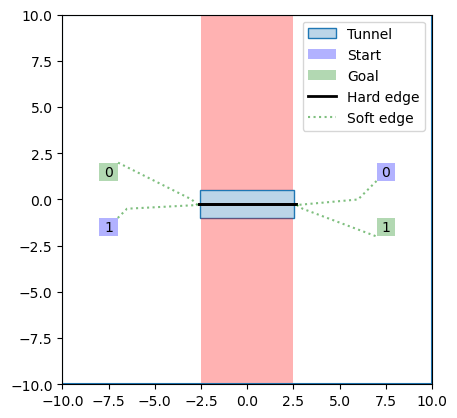

In [3]:
ax = plt.gca()
draw_hybrid(HG,ax)
plt.show()    

In [4]:
from panav.HybridSIPP import HybridSIPP
go_agent = 0
go_graph_path, go_plan = HybridSIPP(HG,HG.start_nodes[go_agent],HG.goal_nodes[go_agent],[],[])

In [5]:
go_graph_path

[(2, 0),
 (1, 6.107634822498801),
 (0, 11.370134822498802),
 (4, 17.4777696449976)]

In [6]:
from panav.HybridSIPP import HybridSIPP
from panav.SIPP import plan_to_transitions
yield_agent = 1
g_plan,c_plan =  HybridSIPP(HG,HG.start_nodes[yield_agent],HG.goal_nodes[yield_agent],[go_graph_path],[go_plan])


In [7]:
from panav.viz import animation,interpolate_positions

from IPython.display import HTML, display
interp_dt = 0.5

times,xs = interpolate_positions(*go_plan,interp_dt)
t2,x2 = interpolate_positions(*c_plan,interp_dt)

pos = [xs,x2]

anim = animation(env, pos, bloating_r, dt = interp_dt / 4)
display(HTML(anim.to_jshtml()))
plt.close()   # Avoid plotting an extra figure.